# Setup

In [1]:
import glob
from utils import make_gray_img, make_pencil_img, simplify, download_model

# Create and Save Gray Images & Sketch Images

In [ ]:
img_paths = glob.glob('./images/*.jpg')  # Change to your original image path
model = './model_gan.t7'  # Change to your model path
simplify(img_paths,model)

# Image Comparison

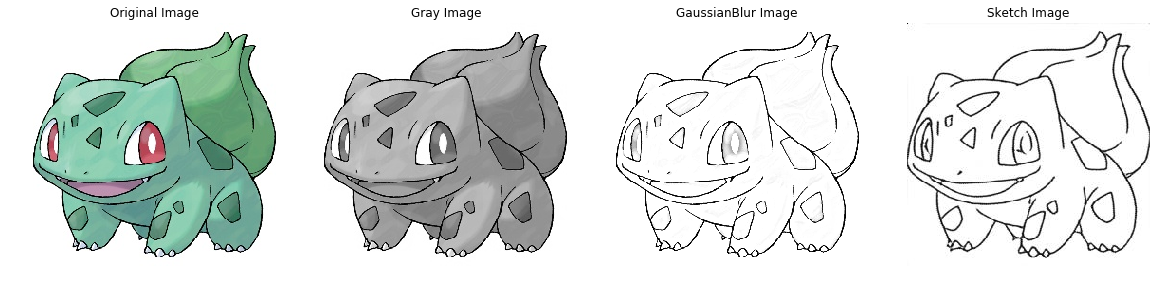

In [2]:
import cv2
import matplotlib.pyplot as plt


# 이미지 불러오기
original_img = cv2.imread('./images/0.jpg')  # Original Image
gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY) # Gray Image
sketch_img = cv2.imread('./sketch/0.jpg')  # Sketch Image

# GaussianBlur Image
img_invert = cv2.bitwise_not(gray_img)
img_smoothing = cv2.GaussianBlur(img_invert,(21,21),sigmaX=0,sigmaY=0)
gaussian_img = cv2.divide(gray_img,255-img_smoothing,scale=256)


# 시각화
titles = ['Original Image','Gray Image','GaussianBlur Image','Sketch Image']
imgs = [original_img, gray_img, gaussian_img, sketch_img]

plt.figure(figsize=(20,20))

for i,img in enumerate(imgs):    
    plt.subplot(1,4,i+1)
    plt.title(titles[i])
    plt.axis('off')
    if i==0:
        plt.imshow(img[:,:,::-1])
    else:
        plt.imshow(img,cmap='gray')

plt.show()

# Model Comparison

start unsqueeze()
start ReplicationPad2d()
don't use cuda
start unsqueeze()
start ReplicationPad2d()
don't use cuda
start unsqueeze()
start ReplicationPad2d()
don't use cuda
start unsqueeze()
start ReplicationPad2d()
don't use cuda


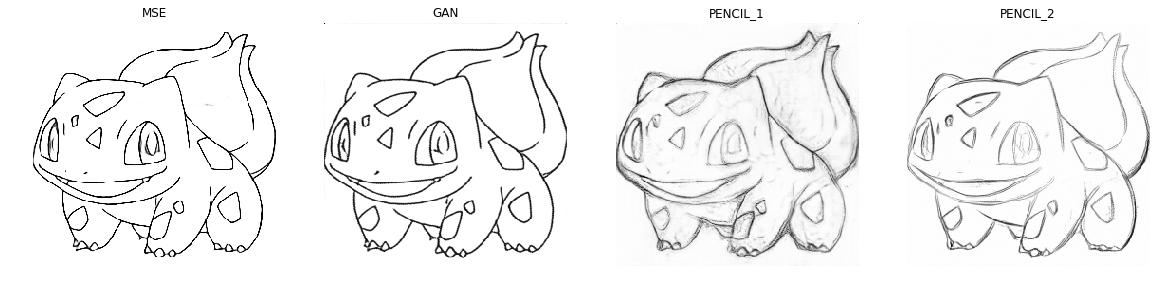

In [10]:
import torch
import matplotlib.pyplot as plt

from PIL import Image
from torchvision import transforms
from torch.utils.serialization import load_lua

models = ['./model_mse.t7','./model_gan.t7', './model_pencil1.t7','./model_pencil2.t7']
titles = ['MSE','GAN','PENCIL_1','PENCIL_2']

plt.figure(figsize=(20, 20))

for i,(model,title) in enumerate(zip(models,titles)):
    use_cuda = torch.cuda.device_count() > 0
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    cache  = load_lua(model,long_size=8)
    # cache = torchfile.load('./model_gan.t7')
    model  = cache.model
    immean = cache.mean
    imstd  = cache.std
    model.evaluate()

    data = Image.open('./gray/0.jpg').convert('L')
    # data = Image.open('./gray.jpg').convert('L')
    # data = data.resize((250, 250))

    w, h = data.size[0], data.size[1]
    pw = 8-(w%8) if w%8!=0 else 0
    ph = 8-(h%8) if h%8!=0 else 0

    print('start unsqueeze()')

    data = ((transforms.ToTensor()(data)-immean)/imstd).unsqueeze(0)
    if pw != 0 or ph != 0:
        data = torch.nn.ReplicationPad2d( (0,pw,0,ph) )( data ).data

    print('start ReplicationPad2d()')
    if use_cuda:
        print(' use cuda')
        pred = model.cuda().forward(data.cuda()).float()
    else:
        print('don\'t use cuda')
        pred = model.forward(data)

    a = pred[0].squeeze(0).numpy()
    plt.subplot(1,4,i+1)
    plt.title(title)
    plt.imshow(a,cmap='gray')
    plt.axis('off')